<a href="https://colab.research.google.com/github/Arthuraarya/SP500_CloseTrend_Prediction./blob/main/S%26P_500_Close_and_Tren_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Download dari Yahoo Finance API , Daily S&P 500

In [ ]:
import yfinance as yf
import pandas as pd
import os

if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")


In [ ]:
sp500.index = pd.to_datetime(sp500.index)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,0.0,0.0
2025-09-09 00:00:00-04:00,6503.330078,6518.229980,6483.080078,6512.609863,4798350000,0.0,0.0
2025-09-10 00:00:00-04:00,6550.290039,6555.970215,6516.339844,6532.040039,5253010000,0.0,0.0


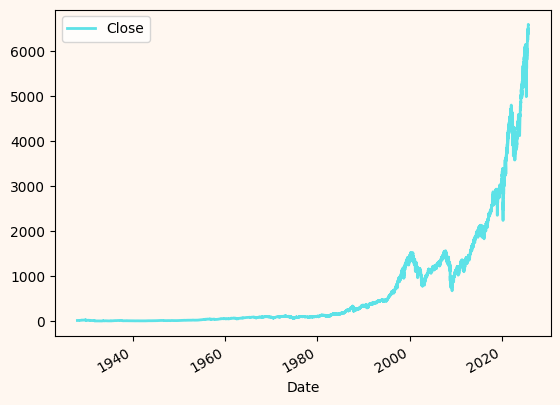

In [ ]:
import matplotlib.pyplot as plt

ax = sp500.plot.line(y="Close", use_index=True, color="#5DE2E7", linewidth=2)
ax.set_facecolor("#FFF7F0")       # background chart area
plt.gcf().patch.set_facecolor("#FFF7F0")  # background figure luar
plt.show()


Regret Not Buying

Menghapus dividend dan stock split ,, Kolom ini lebih cocok untuk analisa individual stock bukan index jadi tidak terlalu butuh

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Target , kita akan mencari tahu apakah stocknya akan naik atau turun

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
#kolom yang menunujukan 'tomorrow' menunjukan harga closing besok

In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
#jadi dengan target = apakah tomorrow lebih besar dari hari ini dijadiin int

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,6512.609863,1
2025-09-09 00:00:00-04:00,6503.330078,6518.229980,6483.080078,6512.609863,4798350000,6532.040039,1
2025-09-10 00:00:00-04:00,6550.290039,6555.970215,6516.339844,6532.040039,5253010000,6587.470215,1


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()
#dengan logika beberapa data yang sudah sangat lama kemungkinan tidak terlalu berpengaruh dan malah merubah fundamental dataset terkini

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])
# pake Random forrest

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6585365853658537

<Axes: xlabel='Date'>

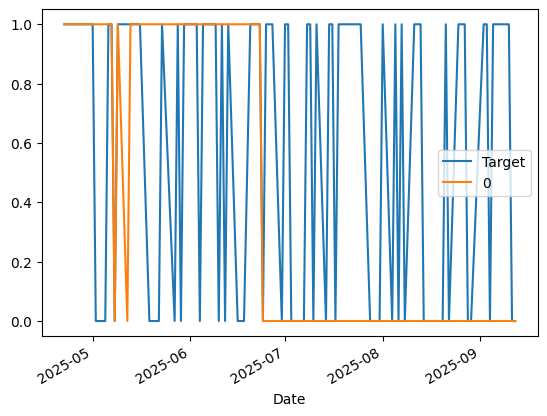

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    #gabungun target+predictions , train predictors ke target

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)
    #rolling back test

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3826
1,2665


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298311444652908

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.536743
0,0.463257


Backtest MAE:  107.45
Backtest MAPE: 3.43%
Per 2025-09-11, prediksi Close besok ≈ 6,373.04


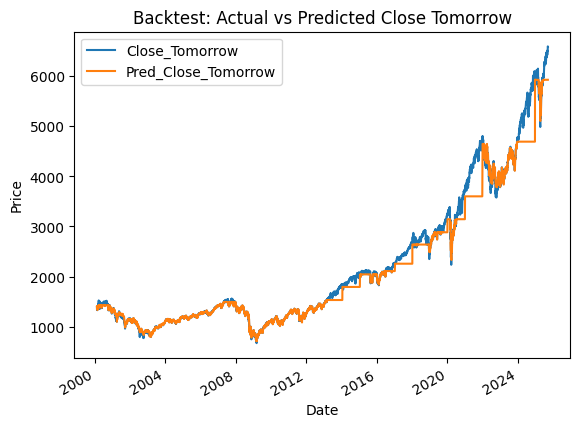

In [ ]:
# === REGRESI: Prediksi harga Close besok ===
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1) Siapkan fitur time-series (tanpa kebocoran)
df = sp500.copy()

# Lag fitur harga/volume
df["Close_Lag1"] = df["Close"].shift(1)
df["Close_Lag5"] = df["Close"].shift(5)
df["Close_Lag20"] = df["Close"].shift(20)
df["Volume_Lag1"] = df["Volume"].shift(1)

# Moving averages & volatilitas
df["MA_5"] = df["Close"].rolling(5).mean()
df["MA_20"] = df["Close"].rolling(20).mean()
df["MA_60"] = df["Close"].rolling(60).mean()
df["STD_20"] = df["Close"].rolling(20).std()

# Momentum sederhana (return harian & kumulatif)
df["Ret_1"] = df["Close"].pct_change(1)
df["Ret_5"] = df["Close"].pct_change(5)
df["Ret_20"] = df["Close"].pct_change(20)

# Target harga besok
df["Close_Tomorrow"] = df["Close"].shift(-1)

# Buang baris awal/akhir yang ada NaN karena rolling/shift
reg_features = [
    "Close", "Open", "High", "Low", "Volume",
    "Close_Lag1", "Close_Lag5", "Close_Lag20", "Volume_Lag1",
    "MA_5", "MA_20", "MA_60", "STD_20",
    "Ret_1", "Ret_5", "Ret_20"
]
reg_df = df.dropna(subset=reg_features + ["Close_Tomorrow"]).copy()

# 2) Model & backtest walk-forward (mirip punyamu)
reg_model = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=50,
    random_state=1,
    n_jobs=-1
)

def predict_reg(train, test, features, model):
    model.fit(train[features], train["Close_Tomorrow"])
    preds = model.predict(test[features])
    out = test[["Close_Tomorrow"]].copy()
    out["Pred_Close_Tomorrow"] = preds
    return out

def backtest_reg(data, model, features, start=2500, step=250):
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test  = data.iloc[i:i+step].copy()
        fold = predict_reg(train, test, features, model)
        all_preds.append(fold)
    return pd.concat(all_preds)

reg_backtest = backtest_reg(reg_df, reg_model, reg_features, start=2500, step=250)

# 3) Evaluasi akurasi (MAE & MAPE)
mae = mean_absolute_error(reg_backtest["Close_Tomorrow"], reg_backtest["Pred_Close_Tomorrow"])
mape = np.mean(
    np.abs(
        (reg_backtest["Close_Tomorrow"] - reg_backtest["Pred_Close_Tomorrow"]) / reg_backtest["Close_Tomorrow"]
    )
) * 100

print(f"Backtest MAE:  {mae:,.2f}")
print(f"Backtest MAPE: {mape:.2f}%")

# 4) Prediksi harga Close "besok" (berdasarkan baris paling akhir yang tersedia)
#    Catatan: ini mengeluarkan estimasi Close untuk hari trading berikutnya setelah tanggal terakhir di data.
last_row = reg_df.iloc[[-1]][reg_features]
reg_model.fit(reg_df[reg_features], reg_df["Close_Tomorrow"])
tomorrow_pred = reg_model.predict(last_row)[0]

last_date = reg_df.index[-1]
print(f"Per {last_date.date()}, prediksi Close besok ≈ {tomorrow_pred:,.2f}")

# (Opsional) Visual perbandingan pada backtest
ax = reg_backtest[["Close_Tomorrow", "Pred_Close_Tomorrow"]].plot(
    title="Backtest: Actual vs Predicted Close Tomorrow", linewidth=1.5
)
ax.set_ylabel("Price")
plt.show()


In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])


In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-08 00:00:00-04:00,6498.089844,6508.669922,6483.290039,6495.149902,5211500000,6512.609863,1,1.001052,1.0,1.004119,3.0,1.030516,33.0,1.094901,143.0,1.343654,528.0
2025-09-09 00:00:00-04:00,6503.330078,6518.229980,6483.080078,6512.609863,4798350000,6532.040039,1,1.001342,2.0,1.003806,4.0,1.032011,33.0,1.097074,143.0,1.346689,529.0
2025-09-10 00:00:00-04:00,6550.290039,6555.970215,6516.339844,6532.040039,5253010000,6587.470215,1,1.001490,2.0,1.004207,4.0,1.033575,34.0,1.099579,143.0,1.350134,529.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    #pembuatan trehshold biar hanya 1 kalau yakin 60%

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4620
1.0,871


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5717566016073479

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.546166
0,0.453834


In [ ]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2025-09-08 00:00:00-04:00,1,0.0
2025-09-09 00:00:00-04:00,1,0.0
2025-09-10 00:00:00-04:00,1,0.0


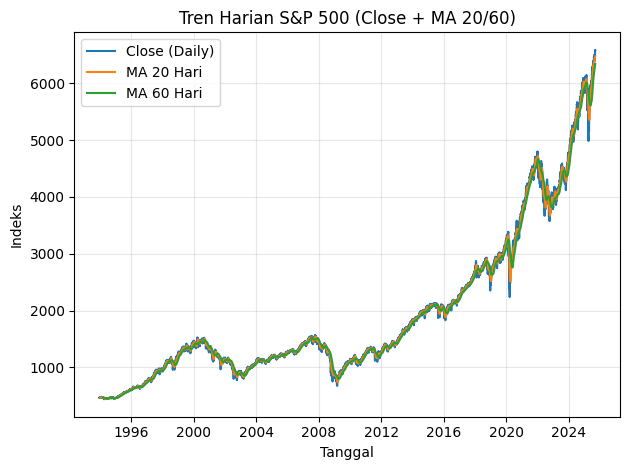

/tmp/ipython-input-740811817.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sp500["Close"].resample("M").last().to_frame(name="Close_M")


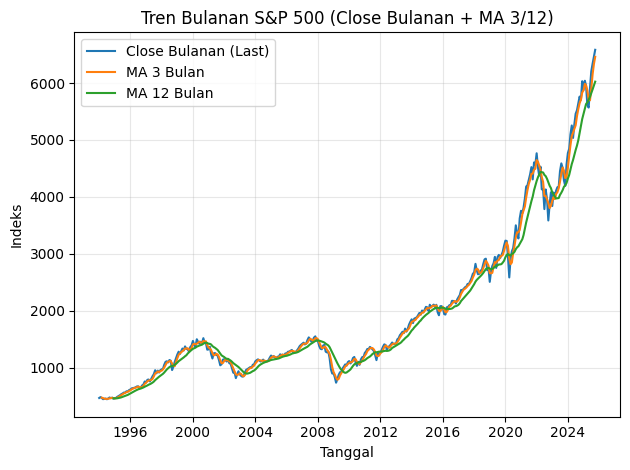

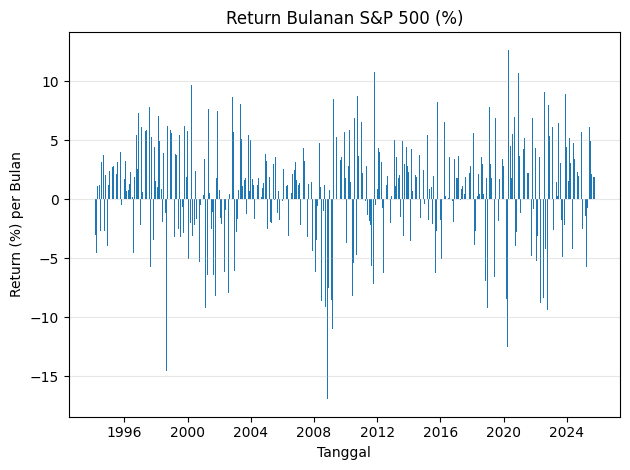

In [ ]:
# Pastikan index bertipe datetime dan terurut
sp500 = sp500.copy()
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.sort_index()

# =========================
# 1) Tren Harian (Close + MA 20D & 60D)
# =========================
daily = sp500[["Close"]].copy()
daily["MA_20D"] = daily["Close"].rolling(20).mean()
daily["MA_60D"] = daily["Close"].rolling(60).mean()

plt.figure()
plt.plot(daily.index, daily["Close"], label="Close (Daily)")
plt.plot(daily.index, daily["MA_20D"], label="MA 20 Hari")
plt.plot(daily.index, daily["MA_60D"], label="MA 60 Hari")
plt.title("Tren Harian S&P 500 (Close + MA 20/60)")
plt.xlabel("Tanggal")
plt.ylabel("Indeks")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 2) Tren Bulanan (Last Close tiap bulan + MA 3M & 12M)
# =========================
# Resample ke akhir bulan: ambil penutupan terakhir tiap bulan
monthly = sp500["Close"].resample("M").last().to_frame(name="Close_M")
monthly["MA_3M"] = monthly["Close_M"].rolling(3).mean()
monthly["MA_12M"] = monthly["Close_M"].rolling(12).mean()

plt.figure()
plt.plot(monthly.index, monthly["Close_M"], label="Close Bulanan (Last)")
plt.plot(monthly.index, monthly["MA_3M"], label="MA 3 Bulan")
plt.plot(monthly.index, monthly["MA_12M"], label="MA 12 Bulan")
plt.title("Tren Bulanan S&P 500 (Close Bulanan + MA 3/12)")
plt.xlabel("Tanggal")
plt.ylabel("Indeks")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# (Opsional) Return Bulanan (bar chart)
# =========================
# Jika ingin melihat tren return bulanan (opsional)
monthly_ret = monthly["Close_M"].pct_change() * 100

plt.figure()
plt.bar(monthly_ret.index, monthly_ret.values, width=20)  # width≈20 hari agar batang terlihat
plt.title("Return Bulanan S&P 500 (%)")
plt.xlabel("Tanggal")
plt.ylabel("Return (%) per Bulan")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


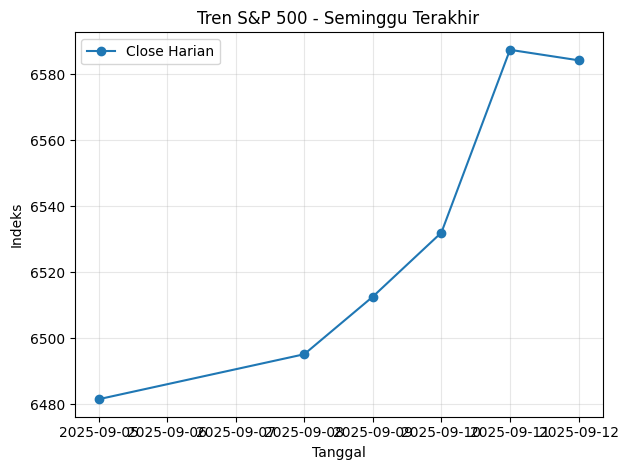

/tmp/ipython-input-685317054.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sp500["Close"].resample("M").last().to_frame(name="Close_Monthly")


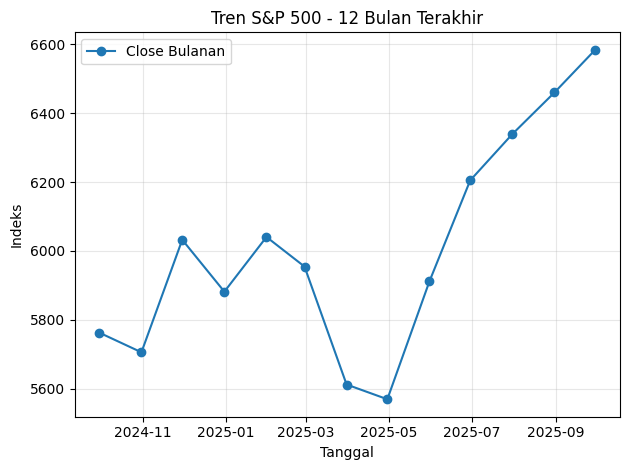

In [ ]:
import matplotlib.pyplot as plt

# Pastikan index datetime
sp500 = sp500.copy()
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.sort_index()

# =====================
# 1) Seminggu Terakhir
# =====================
last_week = sp500.loc[sp500.index >= (sp500.index.max() - pd.Timedelta(days=7))]

plt.figure()
plt.plot(last_week.index, last_week["Close"], marker="o", label="Close Harian")
plt.title("Tren S&P 500 - Seminggu Terakhir")
plt.xlabel("Tanggal")
plt.ylabel("Indeks")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =====================
# 2) 12 Bulan Terakhir
# =====================
# Resample ke akhir bulan → ambil Close terakhir tiap bulan
monthly = sp500["Close"].resample("M").last().to_frame(name="Close_Monthly")
last_12m = monthly.loc[monthly.index >= (monthly.index.max() - pd.DateOffset(months=12))]

plt.figure()
plt.plot(last_12m.index, last_12m["Close_Monthly"], marker="o", label="Close Bulanan")
plt.title("Tren S&P 500 - 12 Bulan Terakhir")
plt.xlabel("Tanggal")
plt.ylabel("Indeks")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
